In [155]:
import numpy as np
import pylab as plt

In [156]:
def motion_mdl(state, distance=0.5):
    x, y, f = state
    f = np.random.normal(f, 0.2)
    d = np.random.normal(distance, 0.02)
    x += d * np.cos(f)
    y += d * np.sin(f)
    return np.array([x, y, f])

In [157]:
def prediction(particles, samples=100):
    return [motion_mdl(state) for _ in range(samples) for state in particles]

In [158]:
def estimate(particles):
    p = np.array(particles)
    return np.mean(p, axis=0)

In [159]:
def weight(measurement, particle):
    x, y, f = particle
    d = ((x-2)**2 + (y-0)**2)
    return 1/abs(d - measurement) + 1/f

In [160]:
def update_robot(real_state):
    x, y, f = real_state
    return x+0.5, y, f

In [161]:
def resampling(state_space, state_weight, samples=30):
    size, count = 0, 0
    result_space , result_weight = [], []
    while size < samples:
        count = np.random.randint(len(state_space))
        if np.random.random() < state_weight[count]:
            result_space.append(state_space[count])
            # result_weight.append(1.0 / samples)
            del state_space[count]
            del state_weight[count]
            size += 1
    return result_space, [] #result_weight

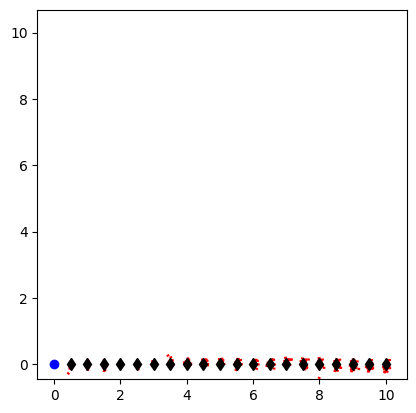

In [162]:
if __name__ == "__main__":
    iter = 20
    init_state = 0, 0, 0
    x, y, _ = init_state
    plt.plot(x, y, 'bo')

    p = [init_state]
    real_state = init_state

    for i in range(iter):
        p = prediction(p)

        real_state = update_robot(real_state)
        # Measure distance from a tree
        measurement = 2.0 - real_state[0]

        w = [weight(measurement, particle) for particle in p]
        w = [wght/sum(w) for wght in w]

        p, _ = resampling(p, w)

        for state in p:
            x, y, f = state
            plt.plot([x, x+0.02*np.cos(f)], [y, y+0.02*np.sin(f)], 'r-')

        # Position estimate
        x,y,f = estimate(p)
        plt.plot([x, x+0.02*np.cos(f)], [y, y+0.02*np.sin(f)], 'g-')

        # Real position
        x,y,f = real_state
        plt.plot(x, y, 'kd')


    plt.axis('square')
    plt.show()
